In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("cv_x_under.csv")

In [3]:
data_crf = data_x.iloc[:, 46:65]

In [4]:
data_crf.head()

,Age when attended assessment centre,mean sbp,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,52.0,122.0,32.261224,5.681356,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,47.0,130.5,26.128611,3.328455,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,65.0,149.5,20.244898,3.383489,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
3,67.0,183.0,26.040662,4.417642,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,49.0,117.5,24.553571,3.866032,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [5]:
data_crf_omit_bp = data_crf.drop(['mean sbp', 'bp medication_0.0', 'bp medication_1.0'], axis=1)

In [6]:
data_crf_omit_bp.head()

,Age when attended assessment centre,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded
0,52.0,32.261224,5.681356,1,0,0,0,1,0,0,0,1,0,0,0,1
1,47.0,26.128611,3.328455,1,0,0,0,1,0,0,1,0,0,1,0,0
2,65.0,20.244898,3.383489,1,0,0,0,0,0,1,0,1,0,0,0,1
3,67.0,26.040662,4.417642,1,0,0,0,1,0,0,0,1,0,0,0,1
4,49.0,24.553571,3.866032,1,0,0,0,1,0,0,1,0,0,0,0,1


In [7]:
data_crf_omit_bp.shape

(20602, 16)

In [8]:
data_crf_omit_bp.size

329632

In [9]:
X = data_crf_omit_bp.values

In [10]:
X.shape

(20602, 16)

In [11]:
X.size

329632

In [12]:
# reading the output variable

In [13]:
data_y = pd.read_csv("cv_y_under.csv")

In [14]:
data_y.head()

,Unnamed: 0,cv
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [15]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [16]:
data_y.shape

(20602, 1)

In [17]:
y = data_y.values

In [18]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [19]:
y.shape

(20602, 1)

In [20]:
# nested cv

In [21]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.7223058501448518
[[0.5211444  0.4788556 ]
 [0.37095785 0.62904215]
 [0.67094386 0.32905617]
 ...
 [0.24545854 0.75454146]
 [0.38434458 0.6156554 ]
 [0.35973912 0.6402609 ]]
accuracy on test data: 
0.668462434478742
[[2169 1285]
 [ 992 2422]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3454
           1       0.65      0.71      0.68      3414

    accuracy                           0.67      6868
   macro avg       0.67      0.67      0.67      6868
weighted avg       0.67      0.67      0.67      6868

feature importances are: 
[0.2532972  0.05671928 0.04517934 0.07148855 0.00801946 0.09280127
 0.04010584 0.03687556 0.00463945 0.01665932 0.14652395 0.19026606
 0.00738453 0.00847853 0.0059212  0.01564041]
best parametrs: 
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
best auc score is : 
0.7224797909856645
[[0.36215752 0.6378425 ]
 [0.4999447  0.5000553 ]
 [0.49390

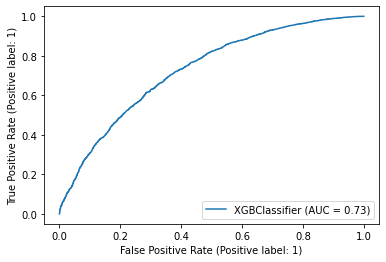

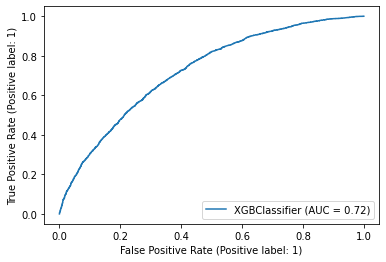

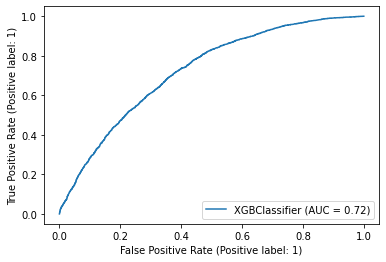

In [22]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [23]:
best_auc

[0.7223058501448518, 0.7224797909856645, 0.7244213685452547]

In [24]:
round(mean(best_auc),2)

0.72

In [25]:
# sensitivity and specificity

In [26]:
# sensitivity for class '0' which is also specificity

In [27]:
sensitivity_class_zero = [0.63, 0.61, 0.63]

In [28]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.62


In [29]:
# sensitivity for class one

In [30]:
sensitivity_class_one = [0.71, 0.71, 0.70]

In [31]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.71


In [32]:
# feature importance

In [33]:
feature_imp

[array([0.2532972 , 0.05671928, 0.04517934, 0.07148855, 0.00801946,
        0.09280127, 0.04010584, 0.03687556, 0.00463945, 0.01665932,
        0.14652395, 0.19026606, 0.00738453, 0.00847853, 0.0059212 ,
        0.01564041], dtype=float32),
 array([0.23587824, 0.04833248, 0.04520251, 0.06879307, 0.00469671,
        0.0709359 , 0.03500633, 0.05730082, 0.0076233 , 0.02032126,
        0.15881774, 0.20027906, 0.0202186 , 0.00656078, 0.00473641,
        0.01529684], dtype=float32),
 array([0.2240495 , 0.04895993, 0.03269069, 0.12344667, 0.00946053,
        0.08597212, 0.04376   , 0.03824705, 0.00851993, 0.01525738,
        0.15195462, 0.18258028, 0.01173634, 0.00660011, 0.00706123,
        0.00970362], dtype=float32)]

In [34]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [35]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [36]:
df_final_FI

,first,second,third
0,0.253297,0.235878,0.224049
1,0.056719,0.048332,0.048960
2,0.045179,0.045203,0.032691
3,0.071489,0.068793,0.123447
4,0.008019,0.004697,0.009461
5,0.092801,0.070936,0.085972
6,0.040106,0.035006,0.043760
7,0.036876,0.057301,0.038247
8,0.004639,0.007623,0.008520
9,0.016659,0.020321,0.015257


In [37]:
df_final_FI.to_csv("FI_values_cv_crf_omitting_bp.csv")

In [38]:
# pred prob

In [39]:
predict_prob[0]

array([[0.5211444 , 0.4788556 ],
       [0.37095785, 0.62904215],
       [0.67094386, 0.32905617],
       ...,
       [0.24545854, 0.75454146],
       [0.38434458, 0.6156554 ],
       [0.35973912, 0.6402609 ]], dtype=float32)

In [40]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [41]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [42]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.521144,0.478856,0.362158,0.637842,0.837758,0.162242
1,0.370958,0.629042,0.499945,0.500055,0.815180,0.184820
2,0.670944,0.329056,0.493903,0.506097,0.770893,0.229107
3,0.441460,0.558540,0.615322,0.384678,0.880488,0.119512
4,0.249285,0.750715,0.562321,0.437679,0.653745,0.346255
...,...,...,...,...,...,...
6863,0.500705,0.499295,0.319323,0.680677,0.400230,0.599770
6864,0.373893,0.626107,0.267324,0.732676,0.247119,0.752881
6865,0.245459,0.754541,0.521636,0.478364,0.334464,0.665536
6866,0.384345,0.615655,0.658527,0.341473,0.242512,0.757488


In [43]:
df_final_pred.to_csv("prob_values_cv_crf_omitting_bp.csv")

In [2]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.73, 0.72, 0.72]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.72
